In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
df= pd.read_csv("churn-bigml-80.csv")#read csv file
print(df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [6]:
# Drop target column if present ('Churn' or similar)
if 'Churn' in df.columns:
    df = df.drop('Churn', axis=1)

In [7]:
# For clustering, drop customer identifiers if present
for col in ['State', 'Area Code', 'Account Length']:
    if col in df.columns:
        df = df.drop(col, axis=1)

In [9]:
# Encode categorical columns automatically
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
# drop rows with missing values
df_encoded = df_encoded.dropna()

In [12]:
#elbow & silhouette method
wcss = []
sil_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_encoded)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_encoded, labels))

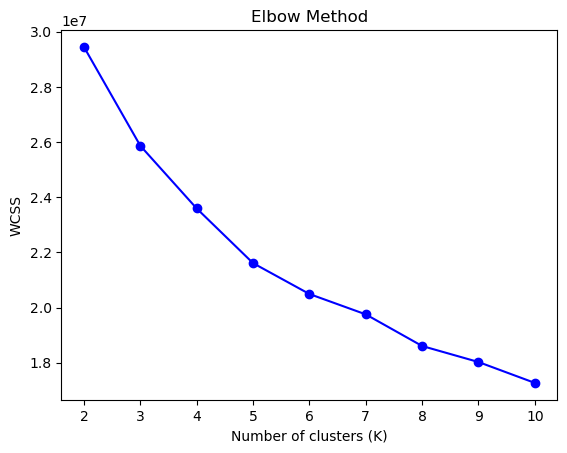

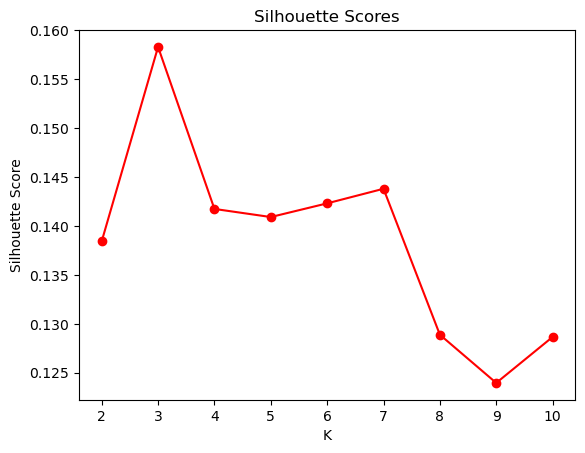

In [13]:
# visualization elbow & silhouette method
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

plt.plot(K, sil_scores, 'ro-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

In [14]:
#fit K means with chosen K
optimal_k = sil_scores.index(max(sil_scores)) + 2  # best silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_encoded)
df_encoded['Cluster'] = clusters


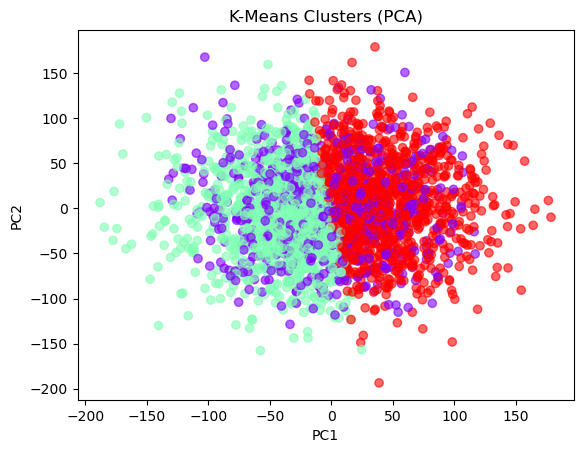

In [15]:
#visualize clusters(PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_encoded.drop('Cluster', axis=1))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_encoded['Cluster'], cmap='rainbow', alpha=0.6)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
